<a href="https://colab.research.google.com/github/Ayben06/CustomerChurnPrediction/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries and Data



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing  import LabelEncoder

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score,classification_report

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurnPrediction/Example/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Manipulation

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<Axes: >

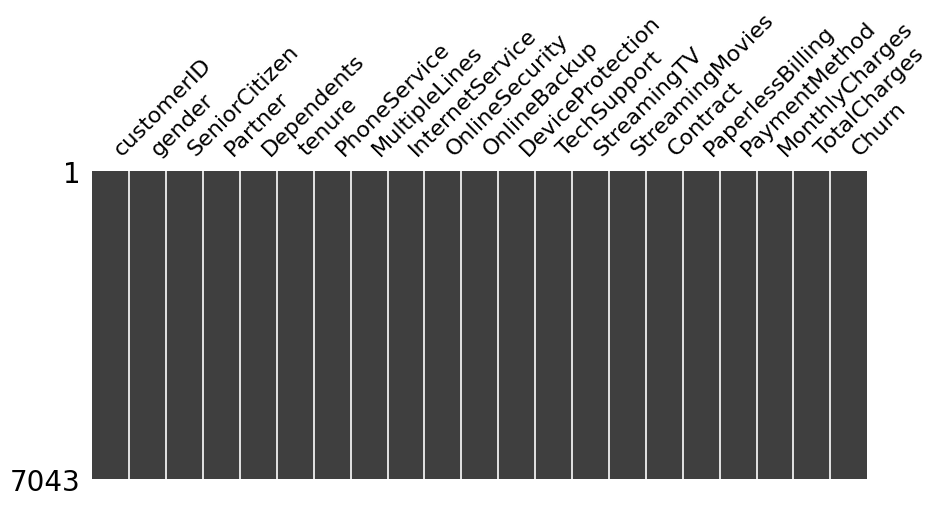

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
# Plot the missing data matrix
msno.matrix(data, ax=ax)

In [ ]:
data=data.drop(['customerID'],axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [ ]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
data[data['tenure']==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:

data.drop(labels=data[data['tenure']==0].index,axis=0,inplace=True)
data[data['tenure']==0].index

Int64Index([], dtype='int64')

In [ ]:
data.fillna(data['TotalCharges'].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data['SeniorCitizen']=data['SeniorCitizen'].map({0:'No',1:'Yes'})

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data['InternetService'].describe(include=['object','bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [ ]:
num_cols=['tenure','MonthlyCharges','TotalCharges']
data[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
data.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


# Data Visualization

In [ ]:
g_labels=['Male','Female']

c_labels=['No','Yes']

fig=make_subplots(rows=1,cols=2,specs=[[{'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=g_labels,values=data['gender'].value_counts(),name='Gender'),1,1)

fig.add_trace(go.Pie(labels=c_labels,values=data['Churn'].value_counts(),name='Churn'),1,2)

fig.update_traces(hole=.4, hoverinfo='label+percent+name',textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    title_x=0.5,
    annotations=[dict(text='Gender', x=0.20, y=0.5 ,font_size=20,showarrow=False),
                dict(text='Churn',x=0.80,y=0.5, font_size=20,showarrow=False)])
fig.show()

In [ ]:
data['Churn'][data['Churn']=='No'].groupby(by=data['gender']).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
data['Churn'][data['Churn']=='Yes'].groupby(by=data['gender']).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

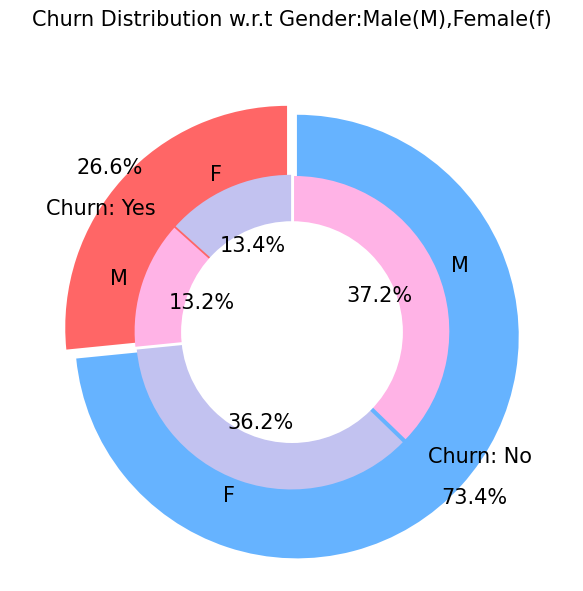

In [ ]:
plt.figure(figsize=(6,6))

labels=["Churn: Yes", "Churn: No"]
values=[1869,5163]

labels_gender=["F","M","F","M"]
sizes_gender=[939,930,2544,2619]

colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']

explode=(0.3,0.3)
explode_gender=(0.1,0.1,0.1,0.1)
textprops={"fontsize":15}

plt.pie(values,labels=labels,autopct="%1.1f%%",pctdistance=1.08,labeldistance=0.8,colors=colors,
        startangle=90,frame=True, explode=explode,radius=10,textprops=textprops,counterclock=True , )

plt.pie(sizes_gender,labels=labels_gender,autopct="%1.1f%%",colors=colors_gender,startangle=90,explode=explode_gender,
        radius=7,textprops=textprops,counterclock=True ,
         )
centre_circle=plt.Circle((0,0),5,color='black',fc='white',linewidth=0)

fig=plt.gcf()

fig.gca().add_artist(centre_circle)


plt.title("Churn Distribution w.r.t Gender:Male(M),Female(f)",fontsize=15,y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
fig=px.histogram(data,x='Churn',color='Contract',
                 barmode='group',title="<b>Customer contract distribution<b>")

fig.update_layout(width=700,height=500,bargap=0.1)

fig.show()

In [ ]:
labels=data['PaymentMethod'].unique()

values=data['PaymentMethod'].value_counts()

fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_layout(title_text="<b>Payment method Distribution</b>",title_x=0.45)
fig.show()


In [ ]:
fig=px.histogram(data,x='Churn',color='PaymentMethod',title="<b>Customer Payment Method distribution w.r.t Churn</b>")
fig.update_layout(width=600,height=500,bargap=0.1)
fig.show()

In [ ]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
data[data['gender']=='Male'][['InternetService','Churn']].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [ ]:
data[data['gender']=='Female'][['InternetService','Churn']].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

In [ ]:
data[data['InternetService']=='DSL'][['Churn','gender']].value_counts()

Churn  gender
No     Male      992
       Female    965
Yes    Male      240
       Female    219
dtype: int64

In [ ]:
fig=go.Figure()
fig.add_trace(go.Bar(
    x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
       ['Male','Female','Male','Female']],
    y=(data[data['InternetService']=='DSL'][['Churn','gender']].value_counts()).values,
    name='DSL'
))

fig.add_trace(go.Bar(
    x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
       ['Male','Female','Male','Female']],
    y=(data[data['InternetService']=='Fiber optic'][['Churn','gender']].value_counts()).values,
    name='Fiber optic'
))

fig.add_trace(go.Bar(
    x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
       ['Male','Female','Male','Female']],
    y=(data[data['InternetService']=='No'][['Churn','gender']].value_counts()).values,
    name='No internet'
))

fig.update_layout(title='<b>Churn Distribution w.r.t Internet Service and Gender</b>',width=900,height=500)

fig.show()

In [ ]:
fig=px.histogram(data,x='Churn',color='Dependents',barmode='group',title="<b>Dependents distribution</b>")

fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

In [ ]:
(data[data['Partner']=='Yes'][['Churn','gender']].value_counts()).values

array([1364, 1360,  350,  319])

In [ ]:
fig=go.Figure()

fig.add_trace(go.Bar(
    x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
       ['Male','Female','Male','Female']],
    y=(data[data['Partner']=='No'][['Churn','gender']].value_counts()).values,
    name='No',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
       ['Male','Female','Male','Female']],
    y=(data[data['Partner']=='Yes'][['Churn','gender']].value_counts()).values,
    name='Yes',
    marker=dict(color='green')

))

fig.update_layout(title='<b>Churn Distribution w.r.t Partner and Gender</b>',width=700,height=500,bargap=0.5)

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig=px.histogram(data,x='Churn',color='SeniorCitizen',title="<b>Churn distribution w.r.t Senior Citizen</b>",color_discrete_map=color_map)
fig.update_layout(width=600,height=500,bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(data,x='Churn',color='OnlineSecurity',barmode='group',title="<b>Churn w.r.t Online Security</b>")
fig.update_layout(width=600,height=500,bargap=0.1)
fig.show()

fig = px.histogram(data, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#PaperlessBilling #PhoneService

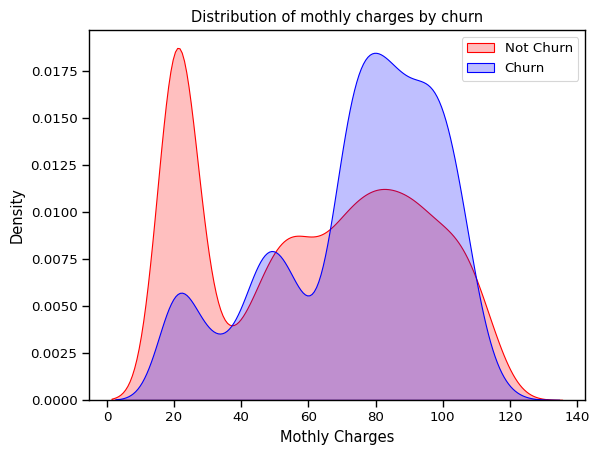

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax=sns.kdeplot(data['MonthlyCharges'][(data['Churn']=='No')],
               color='Red',shade=True);

ax=sns.kdeplot(data['MonthlyCharges'][data['Churn']=='Yes'],
               ax=ax,color='Blue',shade=True)

ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Mothly Charges');
ax.set_title('Distribution of mothly charges by churn');


Text(0.5, 1.0, 'Distribution of total charges by churn')

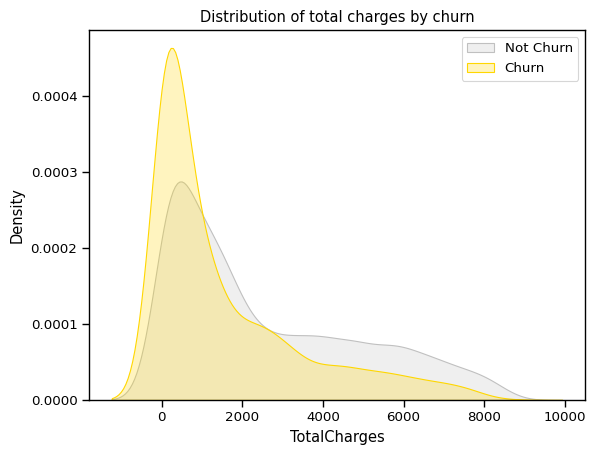

In [ ]:
sns.set_context('paper',font_scale=1.1)
ax=sns.kdeplot(data['TotalCharges'][data['Churn']=='No'],
           color='Silver',shade=True)

ax=sns.kdeplot(data['TotalCharges'][data['Churn']=='Yes'],
               ax=ax, color='Gold',shade=True)

ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_xlabel('TotalCharges')
ax.set_ylabel('Density')
ax.set_title('Distribution of total charges by churn')

In [ ]:
fig=px.box(data,x='Churn',y='tenure')

fig.update_yaxes(title_text='Tenure (Months)',row=1,col=1)


fig.update_yaxes(title_text='Churn',row=1,col=1)

fig.update_layout(autosize=True,width=750,height=600,title_font=dict(size=25,family='Courier'),
                  title='<b>Tenure vs Churn</b>')

fig.show()

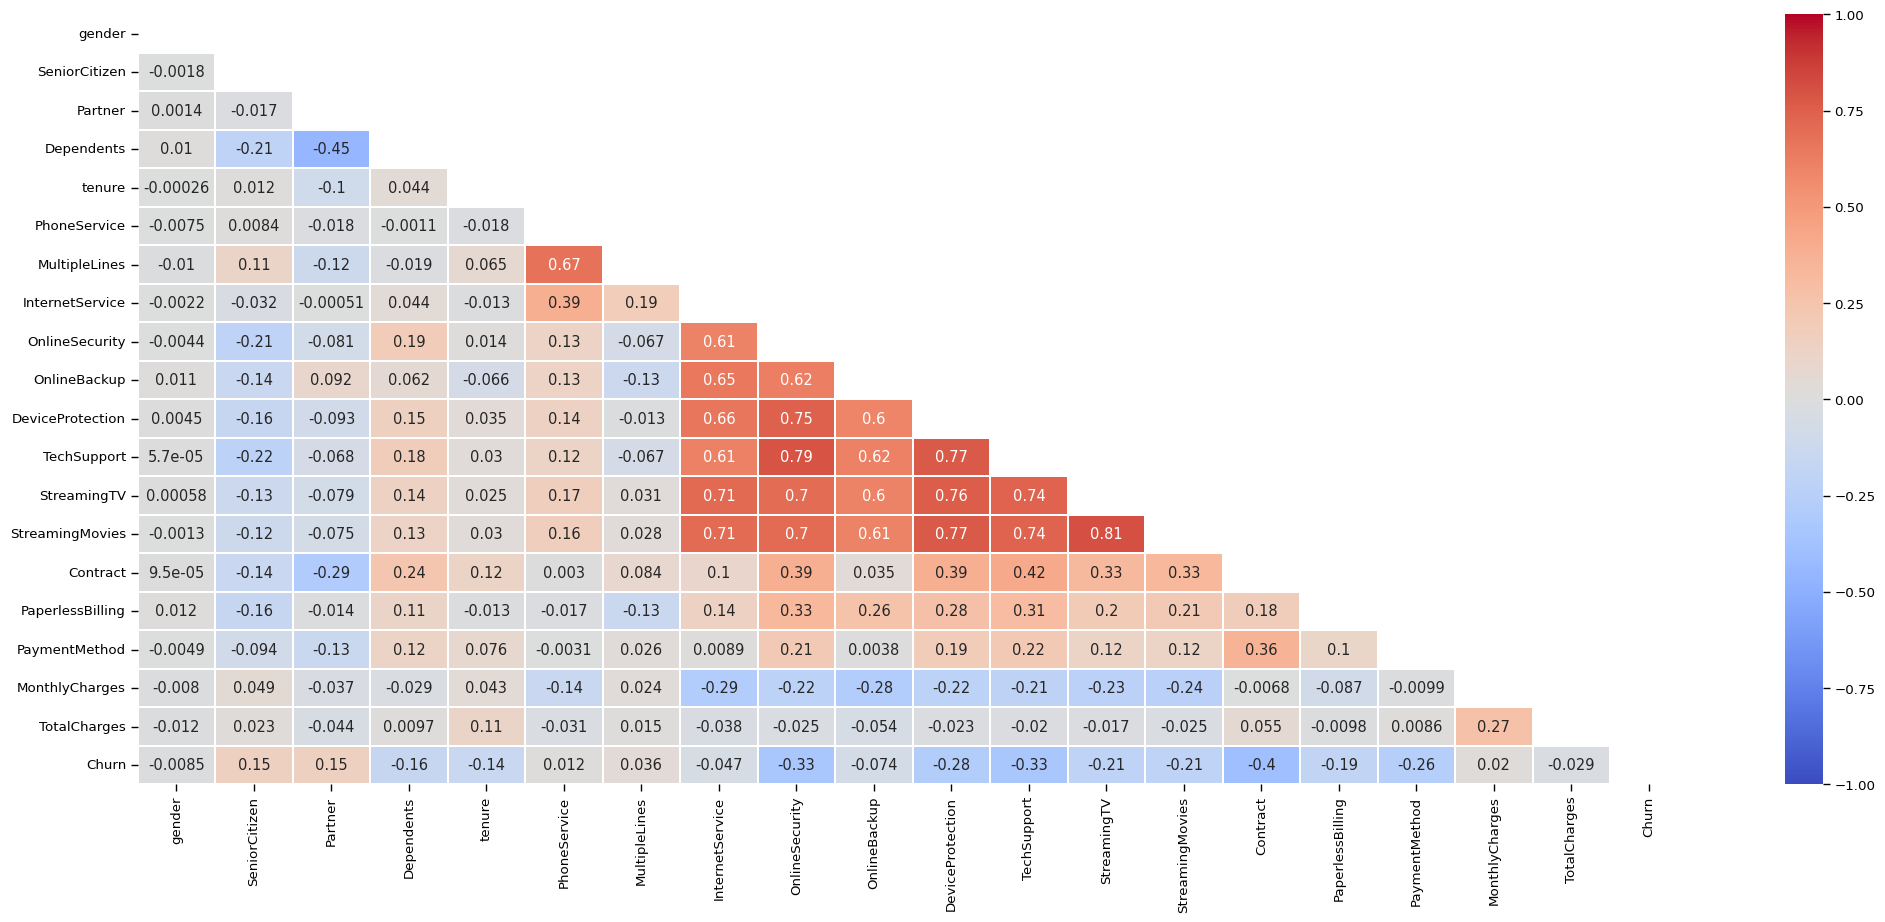

In [ ]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Data Preprocessing

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

data = data.apply(lambda x: object_to_int(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


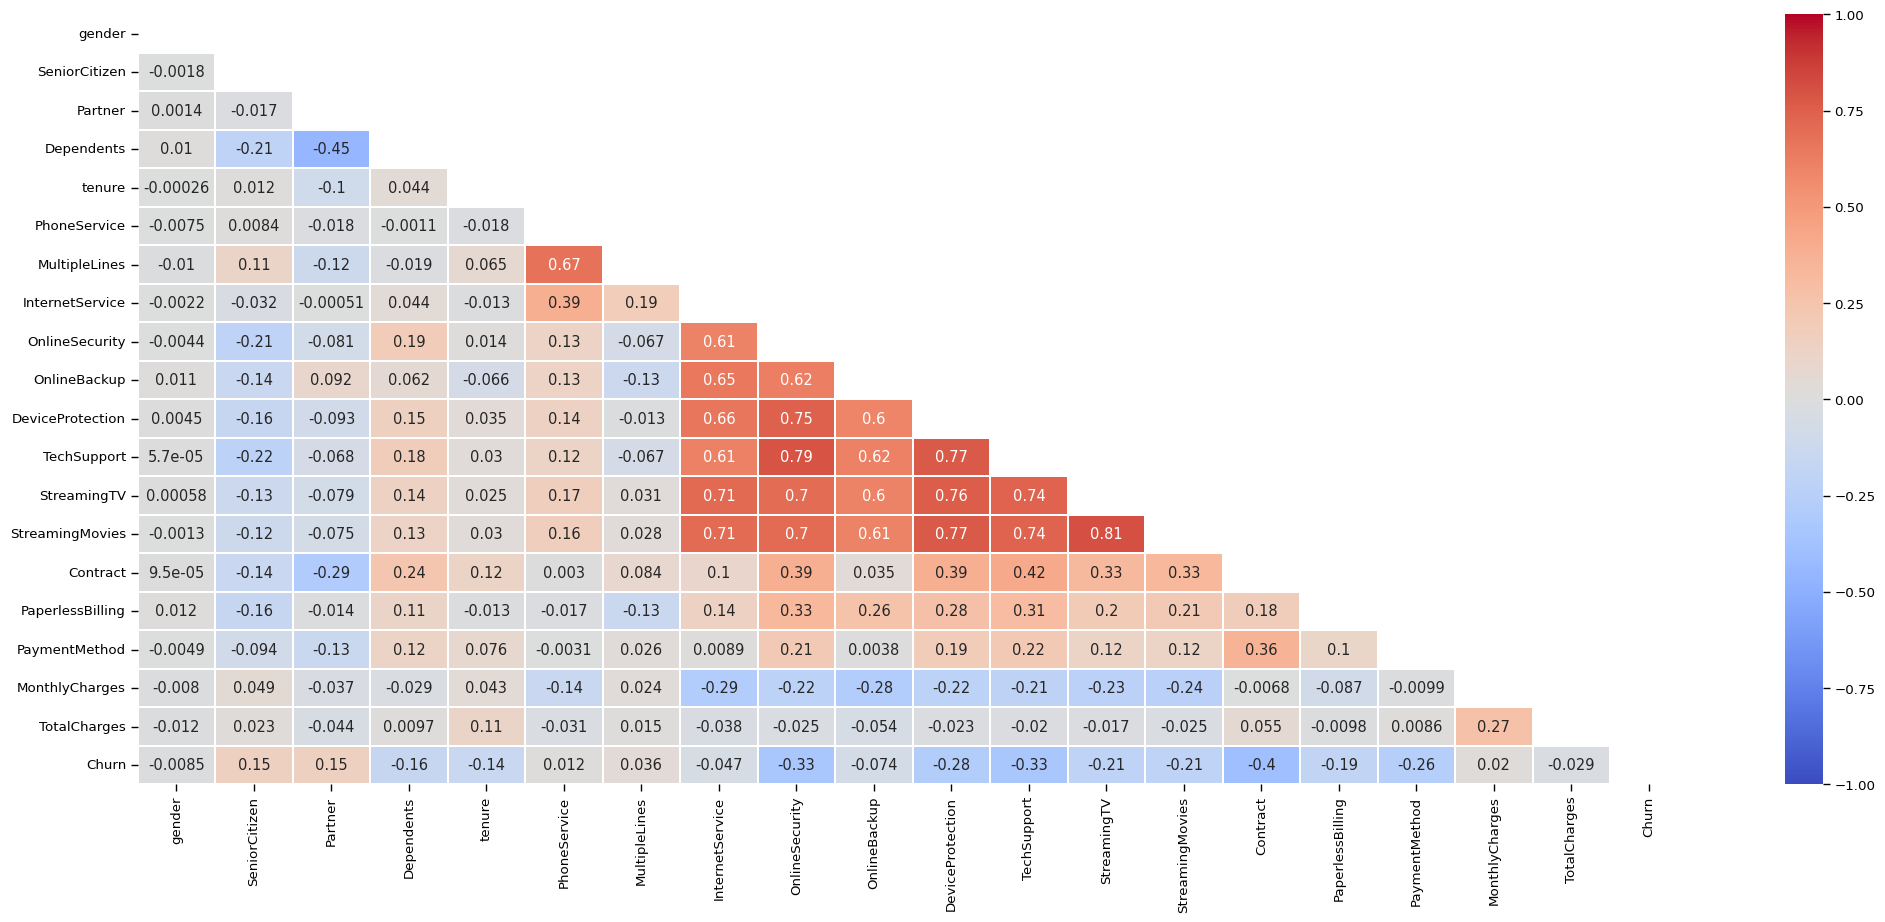

In [ ]:
plt.figure(figsize=(25, 10))

mask = np.triu(np.ones_like(data.corr(), dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
plt.figure(figsize=(14,7))
data.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [ ]:
x=data.drop(columns=['Churn'])
y=data['Churn'].values


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=40,stratify=y)

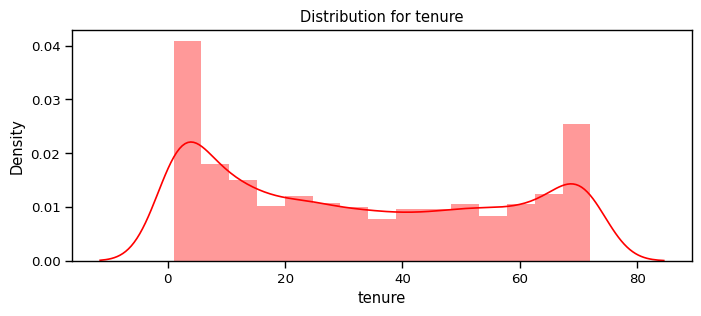

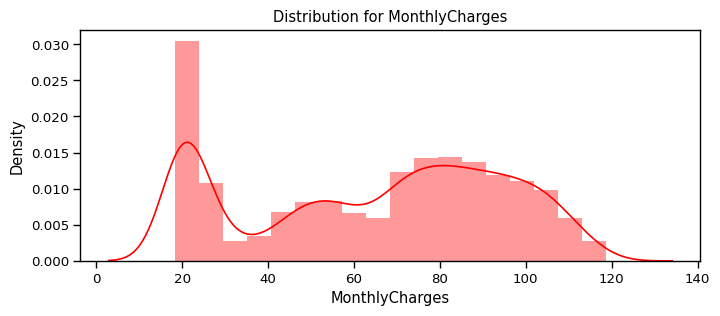

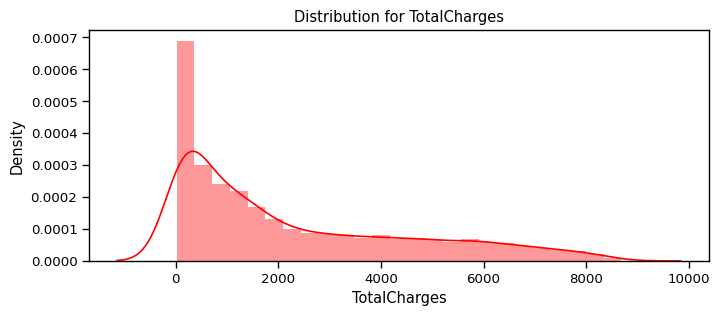

In [ ]:
num_cols=["tenure","MonthlyCharges","TotalCharges"]

for feat in num_cols:
  plt.figure(figsize=(8,3))
  plt.title("Distribution for {}".format(feat))
  ax=sns.distplot(data[feat],color='r')


## Standardizing numeric attributes



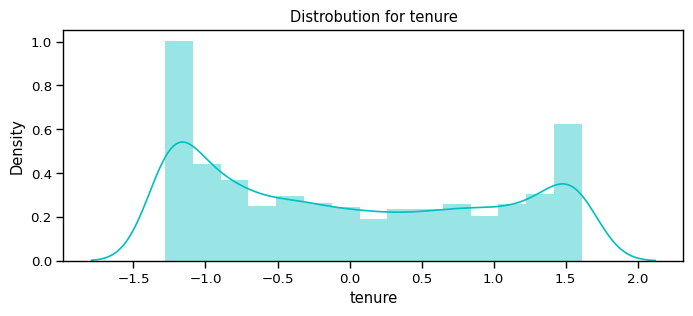

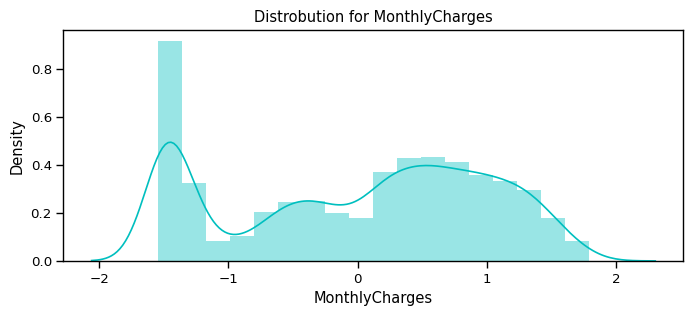

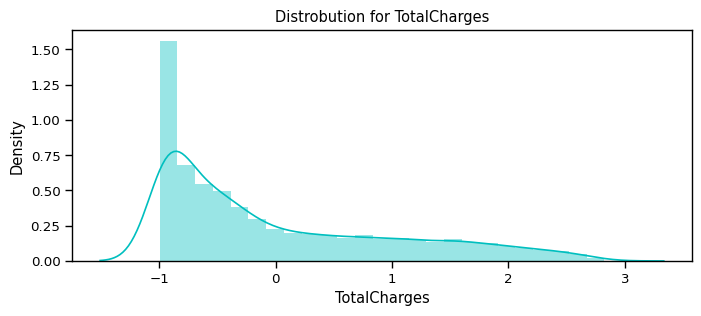

In [ ]:
data_std=pd.DataFrame(StandardScaler().fit_transform(data[num_cols].astype('float64')),
                      columns=num_cols)
for feat in num_cols:
  plt.figure(figsize=(8,3))
  plt.title("Distrobution for {}".format(feat))
  ax=sns.distplot(data_std[feat],color='c')

# Model Evaluations and Predictions

## KNN

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=11)
knn_model.fit(x_train,y_train)
predicted_y=knn_model.predict(x_test)
accuracy_knn=knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.8333333333333334


In [ ]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       0.80      0.50      0.62         8

    accuracy                           0.83        30
   macro avg       0.82      0.73      0.75        30
weighted avg       0.83      0.83      0.82        30



### SVC

In [ ]:
svc_model=SVC(random_state=1)
svc_model.fit(x_train,y_train)
predict_y=svc_model.predict(x_test)
accuracy_svc=svc_model.score(x_test,y_test)
print("SVC accuracy is :",accuracy_svc)

SVC accuracy is : 0.7333333333333333


In [ ]:
print(classification_report(y_test,predict_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        22
           1       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



### Random Forest

In [ ]:
model_rf=RandomForestClassifier(n_estimators=500,oob_score=True,n_jobs=-1,
                                random_state=50,max_features='auto',
                                max_leaf_nodes=30)

model_rf.fit(x_train,y_train)

prediction_test=model_rf.predict(x_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.8333333333333334


In [ ]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       0.80      0.50      0.62         8

    accuracy                           0.83        30
   macro avg       0.82      0.73      0.75        30
weighted avg       0.83      0.83      0.82        30



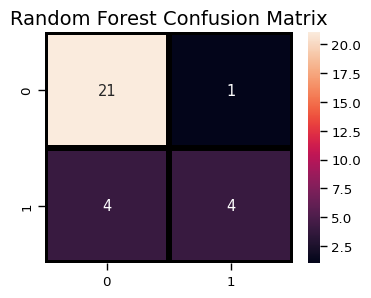

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,prediction_test),
            annot=True,fmt='d',linecolor='k',linewidths=3)
plt.title("Random Forest Confusion Matrix",fontsize=14)
plt.show()
